In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cognifyzintern1/Dataset .csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/kaggle/input/cognifyzintern1/Dataset .csv')
#Printing first five rows only to check whether the dataset has loaded or not
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


Build a regression model to predict the
aggregate rating of a restaurant based on
available features.

In [5]:
#importing the necessary models for training and testing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
#Below statement converts categorical variables to numeric 
df = pd.get_dummies(df,columns=['Has Table booking','Has Online delivery'],drop_first=True)
features = ['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes']
target = 'Aggregate rating'
X = df[features]
y = df[target]

Split the dataset into training and testing sets
and evaluate the model's performance using
appropriate metrics.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Experiment with different algorithms (e.g.,
linear regression, decision trees, random
forest) and compare their performance.

In [8]:
#First we define a dictionary of regression models with which we can experiment 
mdl= {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}
#In the below code fragment using loops we iterate through each model amd print the result
for model_name, model in mdl.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("---------------------------")

Model: Linear Regression
Mean Squared Error: 1.6764802747031442
R-squared: 0.2634446409021949
---------------------------
Model: Decision Tree
Mean Squared Error: 0.20682207300528704
R-squared: 0.9091334932176665
---------------------------
Model: Random Forest
Mean Squared Error: 0.13376495590511908
R-squared: 0.9412308652728747
---------------------------


Analyze the relationship between the type of
cuisine and the restaurant's rating

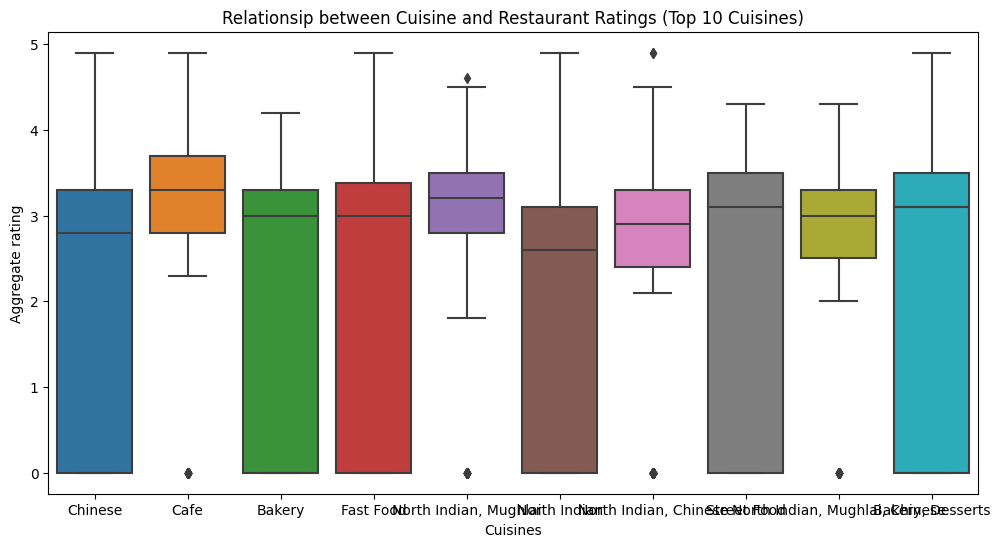

In [9]:
#Since there are numerous cuisines in the dataset , so we will select only the top 10 cuisines
top =10
top_cuisines = df['Cuisines'].value_counts().nlargest(top).index
#To ease our work we can filter the dataset and create a new dataset to include only those points which are in the top 10 cuisines 
df_filtered = df[df['Cuisines'].isin(top_cuisines)]
#To pictorially describe our analysis we can create a box plot and show the relationship using the code fragment below
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='Cuisines', y='Aggregate rating')
plt.title(f'Relationsip between Cuisine and Restaurant Ratings (Top {top} Cuisines)')
plt.show()

Identify the most popular cuisines among
customers based on the number of votes.

In [10]:
#Below we use the groupby function to identify most popular cuisines on the basis of number of votes 
top_cuisines = df.groupby('Cuisines')['Votes'].sum().nlargest(7) 
#Displaying the most popular cuisines 
print('Top Cuisines by number of votes :')
print(top_cuisines)

Top Cuisines by number of votes :
Cuisines
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
Name: Votes, dtype: int64


Determine if there are any specific cuisines
that tend to receive higher ratings.

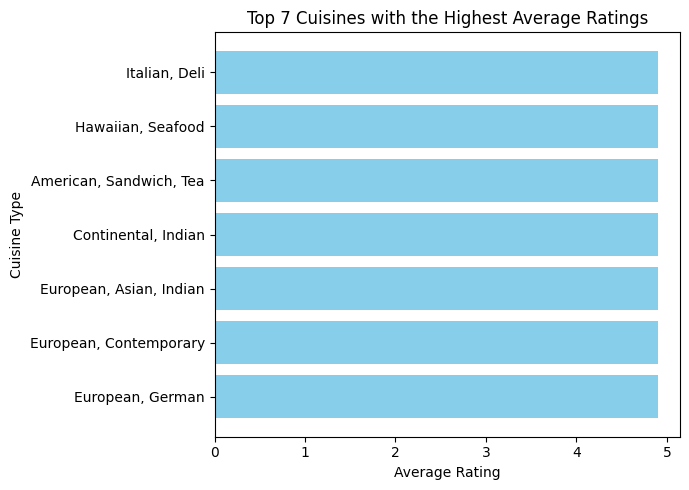

In [11]:
#Using groupby() we group the data by cuisines and calculate mean rating for each cuisine
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
#Now sorting the cuisine ratings in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)
#Visualization using count plot 
plt.figure(figsize=(7, 5))
plt.barh(cuisine_ratings['Cuisines'][:7], cuisine_ratings['Aggregate rating'][:7], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Cuisine Type')
plt.title('Top 7 Cuisines with the Highest Average Ratings')
plt.gca().invert_yaxis()
plt.tight_layout()
#Displaying the plot
plt.show()

Create visualizations to represent the distribution
of ratings using different charts (histogram, bar
plot, etc.).

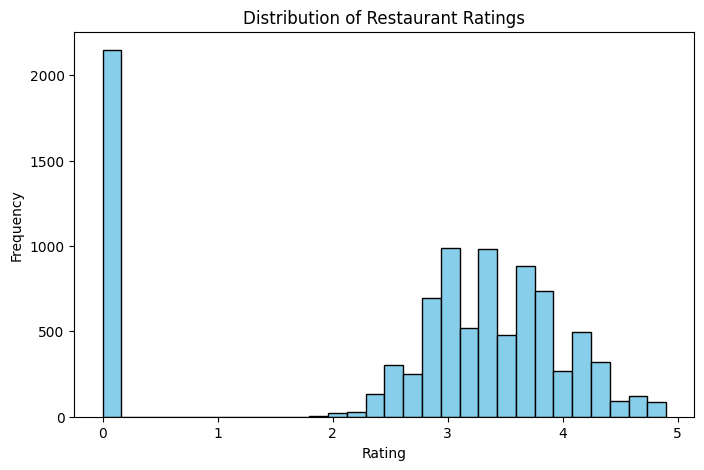

In [12]:
#First we visualise distribution of ratings using histogram 
plt.figure(figsize=(8, 5))
plt.hist(df['Aggregate rating'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ratings')
plt.show()

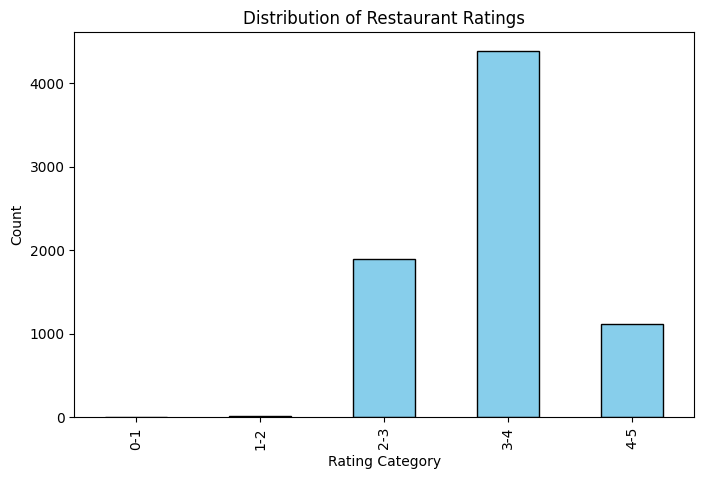

In [13]:
#Here we visualise distribution of ratings using bar chart 
#For bar chart it is necessary to first classify the rating in classes like 0-1 , 1-2 and so on
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
df['Rating Category'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels)
#Next we count the number of restaurants in each rating category , i.e. , whether they fall into 0-1 , 1-2 or other category 
rating_counts = df['Rating Category'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.title('Distribution of Restaurant Ratings')
plt.show()

Compare the average ratings of different cuisines
or cities using appropriate visualizations.

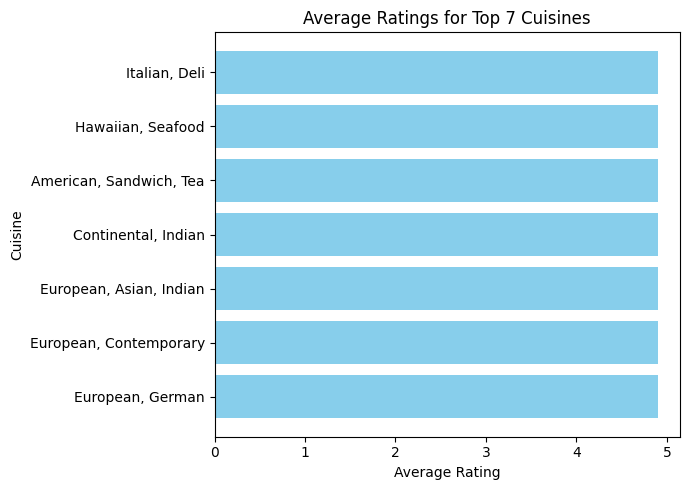

In [14]:
#Firstly using groupby we split the dataset in terms of cuisines 
cuisine_ratings = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)
plt.figure(figsize=(7, 5))
plt.barh(cuisine_ratings['Cuisines'][:7], cuisine_ratings['Aggregate rating'][:7], color='skyblue')
plt.ylabel('Cuisine')
plt.xlabel('Average Rating')
plt.title('Average Ratings for Top 7 Cuisines')
#Below statement is used to display cuisine with highest rating at top
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

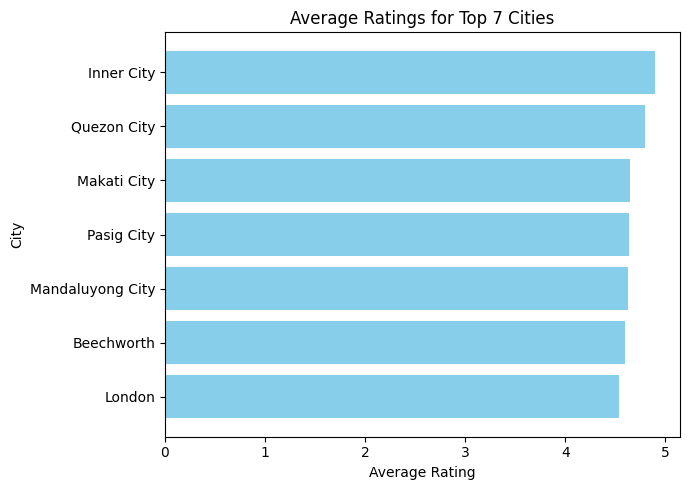

In [15]:
#This time we will visualise the highest average ratings with respect to Cities
#Essentially the code will be same as that for cuisines only the Cuisines will be replaced by Cities
city_ratings = df.groupby('City')['Aggregate rating'].mean().reset_index()
city_ratings = city_ratings.sort_values(by='Aggregate rating', ascending=False)
plt.figure(figsize=(7, 5))
plt.barh(city_ratings['City'][:7], city_ratings['Aggregate rating'][:7], color='skyblue')
plt.ylabel('City')
plt.xlabel('Average Rating')
plt.title(f'Average Ratings for Top 7 Cities')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Visualize the relationship between various
features and the target variable to gain insights.

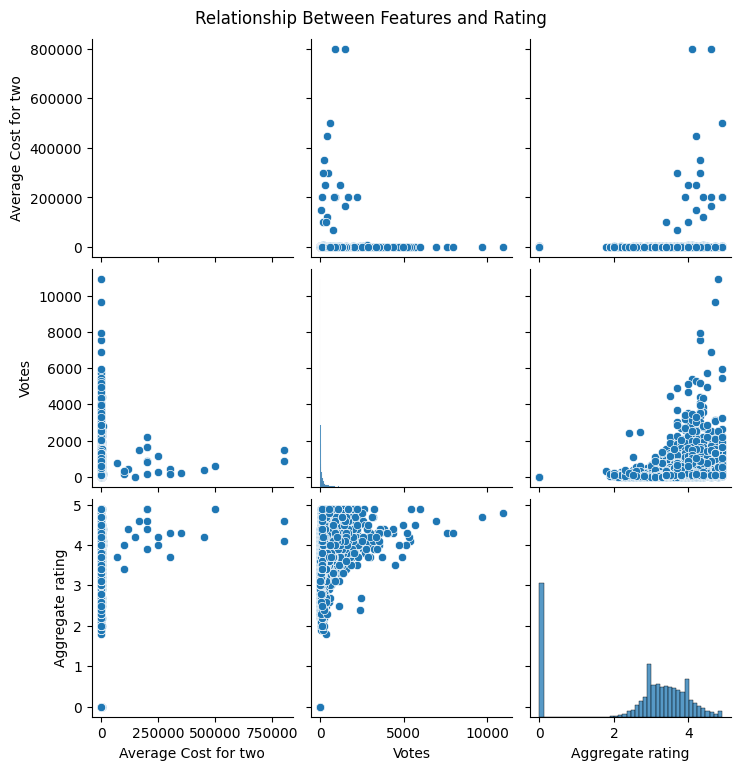

In [16]:
#Lastly in this task we will visualise relationship between various features and target variable to gain insights 
sns.pairplot(data=df, vars=['Average Cost for two', 'Votes', 'Aggregate rating'])
plt.suptitle("Relationship Between Features and Rating", y=1.02)
plt.show()